In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import os
df = pd.read_csv('converted.csv',sep=";", header=0, index_col="ID_STOP")

In [2]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
(df[:200])

,STOP_NAME,LATITUDE,LONGITUDE
ID_STOP,,,
100101,Пр.Ветеранов-1,59.841604,30.253984
100102,Пр.Ветеранов-2,59.842042,30.250084
100103,Ленинский пр.-1,59.851683,30.268385
100104,Ленинский пр.-2,59.849710,30.268348
100105,Автово,59.867292,30.261133
100106,Кировский завод,59.879753,30.261631
100107,Нарвская,59.901064,30.274819
100108,Балтийская,59.907428,30.299786
100109,Пушкинская,59.920514,30.329678


In [3]:
sub = df.loc[df['STOP_NAME'] == "Горьковская"]

In [4]:
sub

,STOP_NAME,LATITUDE,LONGITUDE
ID_STOP,,,
100214,Горьковская,59.956301,30.318997


In [5]:
df=df.drop(df.loc[df['STOP_NAME'] == "Горьковская"].index, inplace=False)

In [6]:
column_names = ["STOP_NAME", "LATITUDE", "LONGITUDE"]
Filter_df =  pd.DataFrame(columns = column_names)

In [7]:
from geopy import distance
subway = (59.956301, 30.318997)
for index, stops in df.iterrows():
    point = (stops['LATITUDE'], stops['LONGITUDE'])
    if (distance.distance(subway, point).km) <= 1:
        Filter_df = Filter_df.append(df.loc[index])
        

In [8]:
Filter_df[['LATITUDE','LONGITUDE']]

,LATITUDE,LONGITUDE
1383,59.960944,30.316399
15454,59.961556,30.304954
15475,59.957651,30.301971
15483,59.961282,30.307840
15485,59.964205,30.310902
16059,59.951649,30.305925
16065,59.954782,30.307793
16072,59.956379,30.311045
16077,59.956536,30.319330
16083,59.954522,30.326731


In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

link = linkage(Filter_df[['LATITUDE','LONGITUDE']], 'ward', 'euclidean')

In [10]:
link[:5]

array([[8.00000000e+00, 1.30000000e+01, 1.58540153e-04, 2.00000000e+00],
       [4.70000000e+01, 4.90000000e+01, 2.16129440e-04, 2.00000000e+00],
       [4.00000000e+00, 4.30000000e+01, 2.48397774e-04, 2.00000000e+00],
       [3.00000000e+00, 2.80000000e+01, 2.56267569e-04, 2.00000000e+00],
       [1.00000000e+00, 2.90000000e+01, 2.58224282e-04, 2.00000000e+00]])

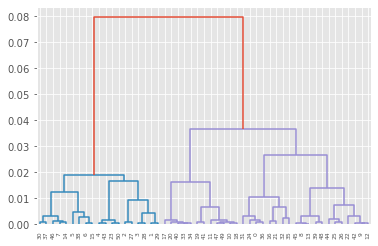

In [11]:
dn = dendrogram(link)

In [12]:
Filter_df['cluster'] = fcluster(link, 0.018 , criterion='distance')

In [13]:
Filter_df.groupby('cluster').mean()

,LATITUDE,LONGITUDE
cluster,,
1,59.956019,30.309636
2,59.961799,30.307687
3,59.960597,30.330623
4,59.962316,30.318690
5,59.955154,30.323391


In [14]:
Filter_df.groupby('cluster').size()

cluster
1     9
2    10
3    12
4     8
5    12
dtype: int64

In [15]:
dist = link[:, 2]
dist

array([0.00015854, 0.00021613, 0.0002484 , 0.00025627, 0.00025822,
       0.0002732 , 0.00032205, 0.00033494, 0.00035599, 0.00038282,
       0.00038987, 0.00053948, 0.00058293, 0.00060474, 0.00063618,
       0.00065845, 0.00070185, 0.00071913, 0.00078016, 0.00078778,
       0.00091772, 0.00094477, 0.00123988, 0.00129447, 0.00143121,
       0.00162759, 0.0016462 , 0.00171776, 0.00183337, 0.00237052,
       0.00264443, 0.00297252, 0.00310838, 0.0031139 , 0.00313259,
       0.00411025, 0.00457559, 0.00637115, 0.00651731, 0.00737316,
       0.00917118, 0.01043647, 0.01239266, 0.01378068, 0.01606066,
       0.01652776, 0.01877545, 0.02654533, 0.03667941, 0.07968031])

Text(22, 0.015, '5 clusters')

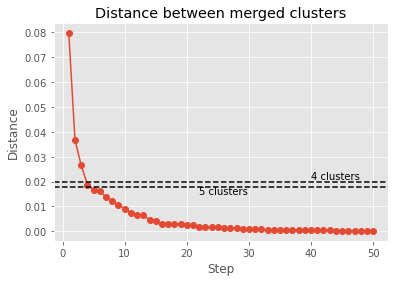

In [16]:
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')
plt.axhline(0.02, c='k', linestyle='dashed')
plt.axhline(0.018, c='k', linestyle='dashed')
plt.text(40, 0.021, '4 clusters')
plt.text(22, 0.015, '5 clusters')

In [94]:
Filter_df['cluster']


1383     4
15454    2
15475    2
15483    2
15485    2
16059    1
16065    1
16072    1
16077    5
16083    5
16088    3
16144    3
16150    5
16153    5
16158    1
16162    1
16448    4
16454    3
16469    3
16509    3
16517    3
16519    4
1683     5
16899    2
17847    4
17848    5
17915    5
18084    2
18086    2
18087    2
19098    1
19099    4
19100    4
19101    3
19106    3
19107    4
19108    4
19110    1
19112    1
2062     5
20657    3
20665    3
2150     5
22378    2
22833    5
23313    5
23324    1
2393     3
3250     5
3579     3
4491     2
Name: cluster, dtype: int32

In [89]:
import folium

#Create base map
map = folium.Map(location=[59.960944,30.316399], zoom_start = 14)

#Save the map
map.save("map1.html")

In [95]:
def color_change(cluster):
    if(cluster == 1 ):
        return('green')
    elif(cluster == 2):
        return('orange')
    elif(cluster == 3):
        return('red')
    elif(cluster == 4):
        return('blue')
    else:
        return('yellow')

In [105]:
for index, stop in Filter_df.iterrows():
    point = (stop['LATITUDE'], stop['LONGITUDE'])
    #print(color_change(stop['cluster']))
    folium.CircleMarker(location=point, radius=2, fill_color = color_change(stop['cluster']), color="gray", fill_opacity = 0.9).add_to(map)
    

In [106]:
map


In [107]:
map.save("Final.html")